## k-최근접 이웃의 한계

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [7]:
data=pd.read_csv('chap3.csv')

length=data['length'].to_numpy()
weight=data['weight'].to_numpy()

In [9]:
train_input,test_input,train_target,test_target=train_test_split(length,weight,random_state=42)

In [11]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [14]:
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [15]:
prevalue=knr.predict([[50]])
print(prevalue)
prevalue=knr.predict([[100]])
print(prevalue)

[1033.33333333]
[1033.33333333]


In [16]:
dis,idx=knr.kneighbors([[50]])#50cm 농어의 이웃을 구함
print(idx)

[[34  8 14]]


In [18]:
trainvalues=train_input[idx],train_target[idx]
print(trainvalues)

(array([[[44.],
        [43.],
        [43.]]]), array([[1000., 1000., 1100.]]))


길이가 100인 농어도 여전히 1033으로 예측이 됨<br>
가장 가까운 이웃의 길이가 45근방이기 때문에 이 샘플들의 무게 평균을 계산하게 된다.<br>
그래서 100000이여도 여전히 1033이 나오게 된다.<br>
**훈련 세트의 범위를 많이 벗어나는 경우 정확하게 예측하기 어렵다는 한계가 있다.**

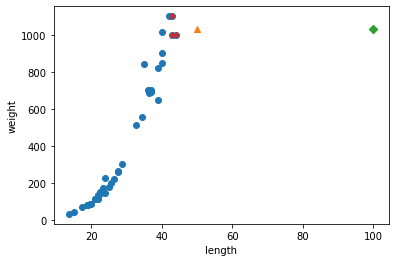

In [25]:
plt.scatter(train_input,train_target)
plt.scatter(50,1033,marker="^")
plt.scatter(100,1033,marker="D")
plt.scatter(train_input[idx],train_target[idx],marker="*")#훈련 세트 중 이웃 샘플만 별표로 다니 나타냄
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형 회귀

**선형 회귀는 종속 변수 y와 하나 이상의 독립변수 x와의 선형 상관관계를 모델링 하는 기법**<br>
x가 1개라면 단순 선형 회귀이고 2개 이상이면 다중 선형 회귀이다.<br><br>
**<span style="color:blue">1) 단순 선형 회귀</span><br>**
**y=Wx+b**<br>
W 값을 **가중치** b를 **편향(bias)** 이라고 부른다.<br>
적절한 W와 b값을 찾는 것이고 그래프의 형태는 **직선**으로 나타낸다.<br><br>
**<span style="color:blue">2) 다중 선형 회귀</span><br>**
**y=W1x1+W2x2+....+WnXn+b**의 식으로 나타낸다. 여러 독립 변수에 의해 영향을 받으며 2개의 독립변수면 그래프는 **평면**으로 나타날 것이다.

이전 실습에서 K-NN 회귀의 한계를 알게됨<br>
농어의 길이만을 이용하여 무게를 예측하기 때문에 **단순 선형 회귀**로 한계를 극복할 수 있다.<br>
직선이 훈련 셋의 평균에 가깝다면 **결정계수(R^2)**의 값은 0에 가까워지며 반대로 예측할 경우 음수가 될 수 있다.<br>
**sklearn.linear_model**패키지 아래 **<span style="color:blue">LinearRegression</span>**클래스를 사용<br>

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [31]:
print(lr.predict([[50]]))#1241로 1033보다 높게 나옴
print(lr.predict([[15]]))#음수로 나옴 실제로 있을 수는 없는 일

[1241.83860323]
[-123.7614705]


In [32]:
print(lr.coef_,lr.intercept_) #y=ax+b에서 a와 b의 값 -> y=(39.01...)x-(709.01...)

[39.01714496] -709.0186449535477


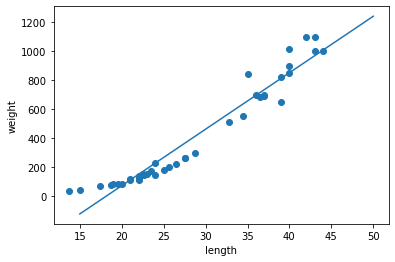

In [34]:
plt.scatter(train_input,train_target)
plt.plot([15,50],[lr.predict([[15]]),lr.predict([[50]])])#15에서 50까지 1차 방정식 그래프 그림(15*lr.coef_,lr.intercept_와 동일)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

실제로 농어의 데이터는 직선보다 곡선에 더 가까움 최적의 곡선을 찾는다면 더 정확한 예측이 가능할 것이다.<br>
2차 방정식을 구함<br>


## 다항 회귀
>다중 회귀는 2개 이상의 독립 변수 존재, 다항 회귀는 하나의 독립 변수를 이용하여 차수를 높이는 개념

In [36]:
#column_stack 함수는 열 방향으로 배열을 합쳐줌
train_poly=np.column_stack((train_input**2,train_input)) # 2차 방정식을 구하기 위해서 길이를 제곱한 항을 추가
test_poly=np.column_stack((test_input**2,test_input))

In [37]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [41]:
lr=LinearRegression()
lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [42]:
print(lr.coef_,lr.intercept_) #2차 방정식의 이차항 계수가 1.014, 일차항의 계수가 -21.5579...를 의미 -> y=1.014x^2-21.5579x+116.05

[  1.01433211 -21.55792498] 116.05021078278259


In [40]:
#약간의 과소적합이 있지만 선형 회귀보다는 나아짐
print("훈련점수 = ",lr.score(train_poly,train_target))
print("테스트점수 = ",lr.score(test_poly,test_target))

훈련점수 =  0.9706807451768623
테스트점수 =  0.9775935108325121


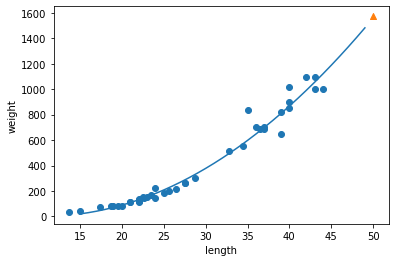

In [52]:
point = np.arange(15, 50) # 15에서 49까지 정수 배열
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05) #15~49 2차 방정식 그래프
plt.scatter([50], lr.predict([[50**2,50]]), marker='^')# 50cm 농어 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()